In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [ ]:
import pathlib
data_dir += "/flower_photos"
data_dir = pathlib.Path(data_dir)
data_dir


In [33]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [26]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [27]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [28]:
img.shape

(240, 179, 3)

In [29]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [34]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [35]:
X = np.array(X)
y = np.array(y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [40]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.2677 - loss: 1.6328
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.5848 - loss: 1.0442
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.6687 - loss: 0.8607
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 100ms/step - accuracy: 0.7402 - loss: 0.6901
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.8264 - loss: 0.4767
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9031 - loss: 0.2797
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - accuracy: 0.9460 - loss: 0.1800
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9775 - loss: 0.0842
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9846 - loss: 0.0578
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.9800 - loss: 0.0621
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.9966 - loss: 0.0239
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/st

In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6623 - loss: 2.3391


[2.4557290077209473, 0.6514161229133606]

In [42]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


array([[  1.4618523 ,  28.504263  ,  -0.63387364, -15.995436  ,
          1.9016439 ],
       [  9.208645  ,  -0.38234913, -13.016958  ,  -5.6760545 ,
          6.5615873 ],
       [ -2.565915  ,   4.8109493 ,  19.900776  ,  -6.8189526 ,
         -2.6859882 ],
       ...,
       [ -6.4979343 ,  -3.567497  ,  -3.5748627 ,   9.579473  ,
         10.572245  ],
       [ 14.096275  ,   4.7193594 ,  -8.38343   ,  -9.44182   ,
          7.0640697 ],
       [  1.7774789 , -18.548988  ,  -0.6404515 ,  11.579856  ,
          5.0661254 ]], dtype=float32)

In [43]:
score = tf.nn.softmax(predictions[0])
np.argmax(score)


np.int64(1)

In [ ]:
y_test[0]

np.int64(1)

In [54]:
img_height = 180
img_width = 180

data_augmentation = keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),  
    layers.RandomFlip(mode="horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


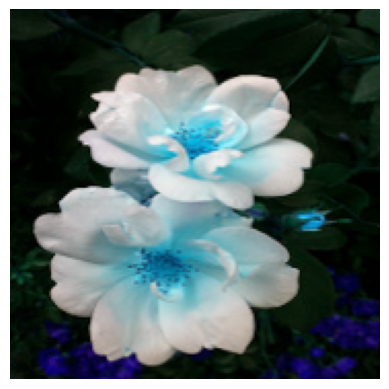

In [55]:
plt.axis('off')
plt.imshow(X[0])

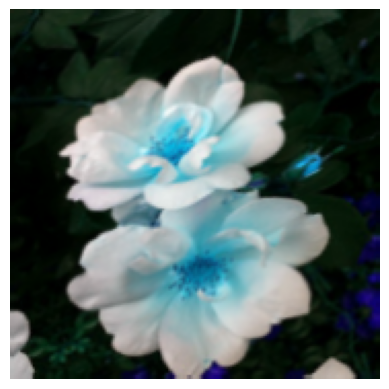

In [56]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [57]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30) 

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 116ms/step - accuracy: 0.3098 - loss: 1.5361
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.5471 - loss: 1.1240
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.6029 - loss: 0.9947
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.6349 - loss: 0.9441
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - accuracy: 0.6745 - loss: 0.8528
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.6928 - loss: 0.8048
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.6994 - loss: 0.7708
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.7433 - loss: 0.6981
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.7265 - loss: 0.7159
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - accuracy: 0.7449 - loss: 0.6816
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 149ms/step - accuracy: 0.7433 - loss: 0.6578
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 12

In [58]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7574 - loss: 0.7957


[0.8265818953514099, 0.7483659982681274]